In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-professionals-salary-dataset-2022/Partially Cleaned Salary Dataset.csv
/kaggle/input/data-professionals-salary-dataset-2022/Salary Dataset.csv


**This Dataset consists of salaries for Data Scientists, Machine Learning Engineers, Data Analysts, and Data Engineers in various cities across India (2022).**

**-Salary Dataset.csv**

**-Partially Cleaned Salary Dataset.csv**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Download Dataset

df = pd.read_csv('/kaggle/input/data-professionals-salary-dataset-2022/Partially Cleaned Salary Dataset.csv')

In [4]:
display(df)

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [5]:
# Excluding column 'Unnamed: 0'
df.drop(["Unnamed: 0"], axis=1, inplace = True)

In [6]:
# Rename columns
df.rename(columns = {'Company Name':'Company_Name', 'Job Title':'Job_Title'}, inplace = True)

In [7]:
# Duplicates
df.duplicated().value_counts()

False    4339
dtype: int64

In [8]:
# Check dataframe dtype and NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Name       4339 non-null   object 
 1   Job_Title          4339 non-null   object 
 2   Salaries Reported  4339 non-null   int64  
 3   Location           4339 non-null   object 
 4   Salary             4339 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 169.6+ KB


In [9]:
# Check the number of null numbers (NaN)
df.isnull().sum()

Company_Name         0
Job_Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [10]:
df.describe()

,Salaries Reported,Salary
count,4339.000000,4.339000e+03
mean,2.777138,1.119885e+06
std,5.148095,4.300905e+06
min,1.000000,1.081400e+04
25%,1.000000,4.199380e+05
50%,1.000000,7.062830e+05
75%,3.000000,1.196675e+06
max,105.000000,1.661404e+08


In [11]:
# Check data types in df

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 2
Discrete features Count 0
Continuous features Count 2
Categorical features Count 3
Binary Categorical features Count 0


In [12]:
continuous_features = [feature for feature in continuous_features]
continuous_features

['Salaries Reported', 'Salary']

In [13]:
def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(8,4))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

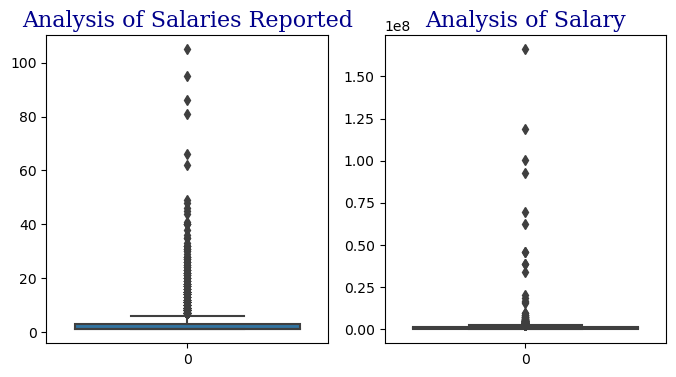

In [14]:
# Show outliers

plot_boxplot(df, continuous_features)

In [15]:
outliers_features = [feature for feature in continuous_features]
print(outliers_features)

['Salaries Reported', 'Salary']


In [16]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe
    
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

In [17]:
# Remove outliers

df = remove_outliers(df,outliers_features)

In [18]:
df.shape

(4339, 5)

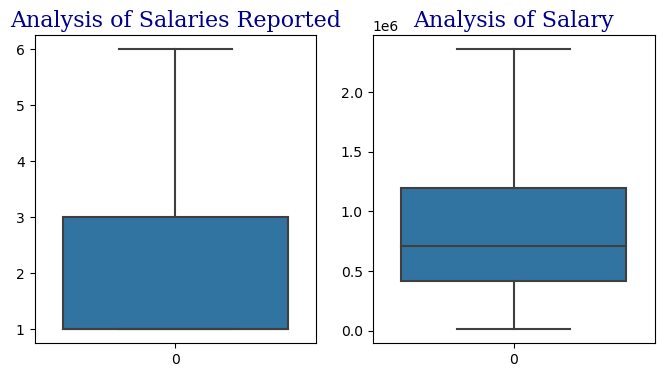

In [19]:
plot_boxplot(df, outliers_features)

In [20]:
def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,5))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

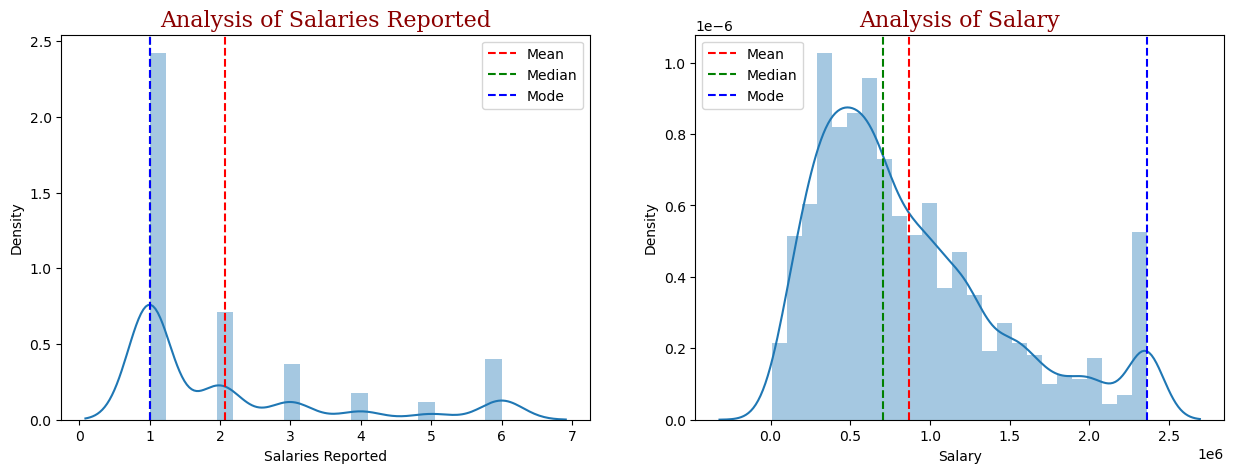

In [21]:
generate_distribution_plot(df, continuous_features)

In [22]:
# Checking non-numeric columns of df
df.describe(include=['O'])

,Company_Name,Job_Title,Location
count,4339,4339,4339
unique,2528,25,5
top,Tata Consultancy Services,Data Scientist,Bangalore
freq,41,1844,1584


In [23]:
# Location X Salary

df[['Location', 'Salary']].groupby(['Location'], as_index=False).mean().sort_values(by='Salary', ascending=False)

,Location,Salary
0,Bangalore,970820.803914
4,Pune,823454.745627
3,New Delhi,813125.816794
1,Hyderabad,797156.805680
2,Mumbai,796898.550049


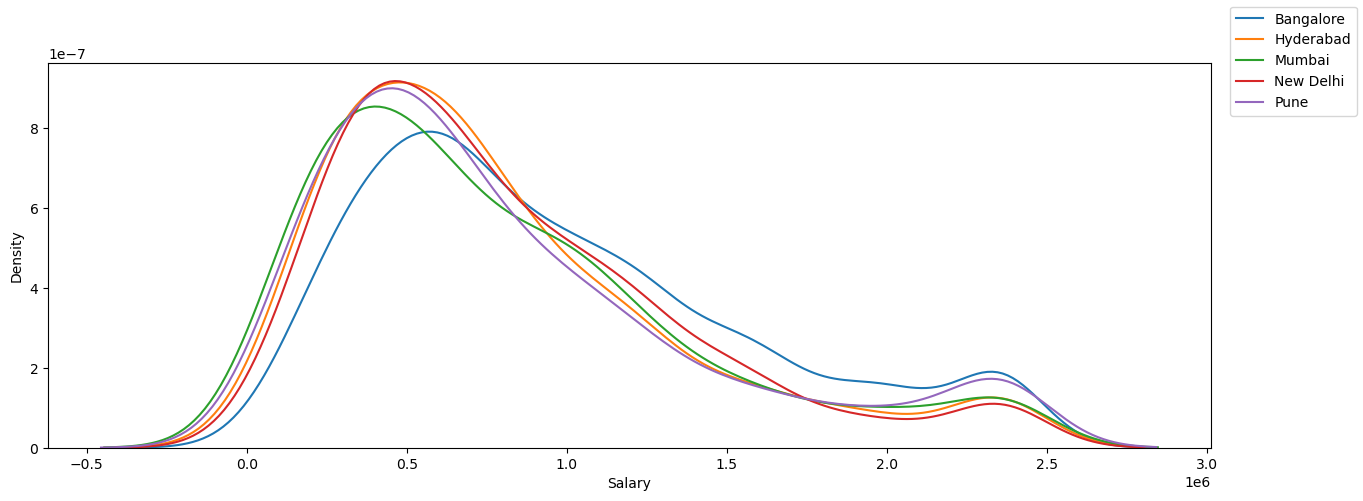

In [24]:
# Distplot Location X Salary

fig = plt.figure(figsize=(15,5))
sns.distplot(df[df['Location']=='Bangalore']['Salary'], hist=False)
sns.distplot(df[df['Location']=='Hyderabad']['Salary'],hist=False)
sns.distplot(df[df['Location']=='Mumbai']['Salary'],hist=False)
sns.distplot(df[df['Location']=='New Delhi']['Salary'],hist=False)
sns.distplot(df[df['Location']=='Pune']['Salary'],hist=False)


fig.legend(labels=['Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Pune'])

plt.show()

In [25]:
# Location - Count
location = df.Location.value_counts()
location.head()

Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: Location, dtype: int64

In [26]:
# Function to set graphics
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 20}

<Figure size 1500x1000 with 0 Axes>

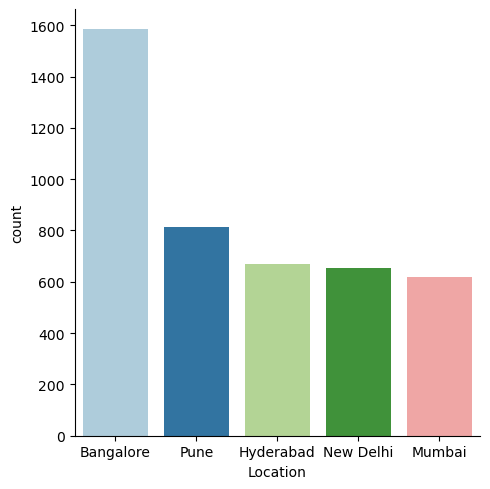

In [27]:
figure_size()
sns.catplot(x='Location',data = df,kind = 'count',palette = 'Paired')
plt.show()

In [28]:
# Top 5 Location by Salary
avg_location = df.groupby('Location')['Salary'].mean().reset_index()
avg_location = avg_location.sort_values(by='Salary', ascending=False)

top_5_job = avg_location.head(5)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_5_job['Location'], y=top_5_job['Salary']))

fig.update_layout(title='Top 5 Location by Salary',
                  xaxis_title='Location',
                  yaxis_title='Average Salary',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [29]:
# Job Title X Salary (avg)

df[['Job_Title', 'Salary']].groupby(['Job_Title'], as_index=False).mean().sort_values(by='Salary', ascending=False).round(2)

,Job_Title,Salary
5,Data Science Consultant,2361780.00
6,Data Science Lead,2361780.00
7,Data Science Manager,2361780.00
11,Lead Data Scientist,1772629.33
22,Senior Data Scientist,1652806.46
24,Software Engineer - Machine Learning,1566780.00
21,Machine Learning Software Engineer,1397347.00
23,Senior Machine Learning Engineer,1330295.67
4,Data Science Associate,1203913.00
8,Data Scientist,1035381.17


In [30]:
avg_salary = df.groupby('Job_Title')['Salary'].mean().reset_index()
avg_salary = avg_salary.sort_values(by='Salary', ascending=False)

top_10_job = avg_salary.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10_job['Job_Title'], y=top_10_job['Salary']))

fig.update_layout(title='Top 10 Job Title by Salary',
                  xaxis_title='Job Title',
                  yaxis_title='Average Salary',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [31]:
# Job Title - Count
job = df.Job_Title.value_counts()
job.head(10)

Data Scientist                      1844
Data Analyst                         988
Data Engineer                        804
Machine Learning Engineer            568
Data Science                          43
Senior Data Scientist                 39
Junior Data Scientist                 18
Senior Machine Learning Engineer       9
Lead Data Scientist                    6
Machine Learning Scientist             2
Name: Job_Title, dtype: int64

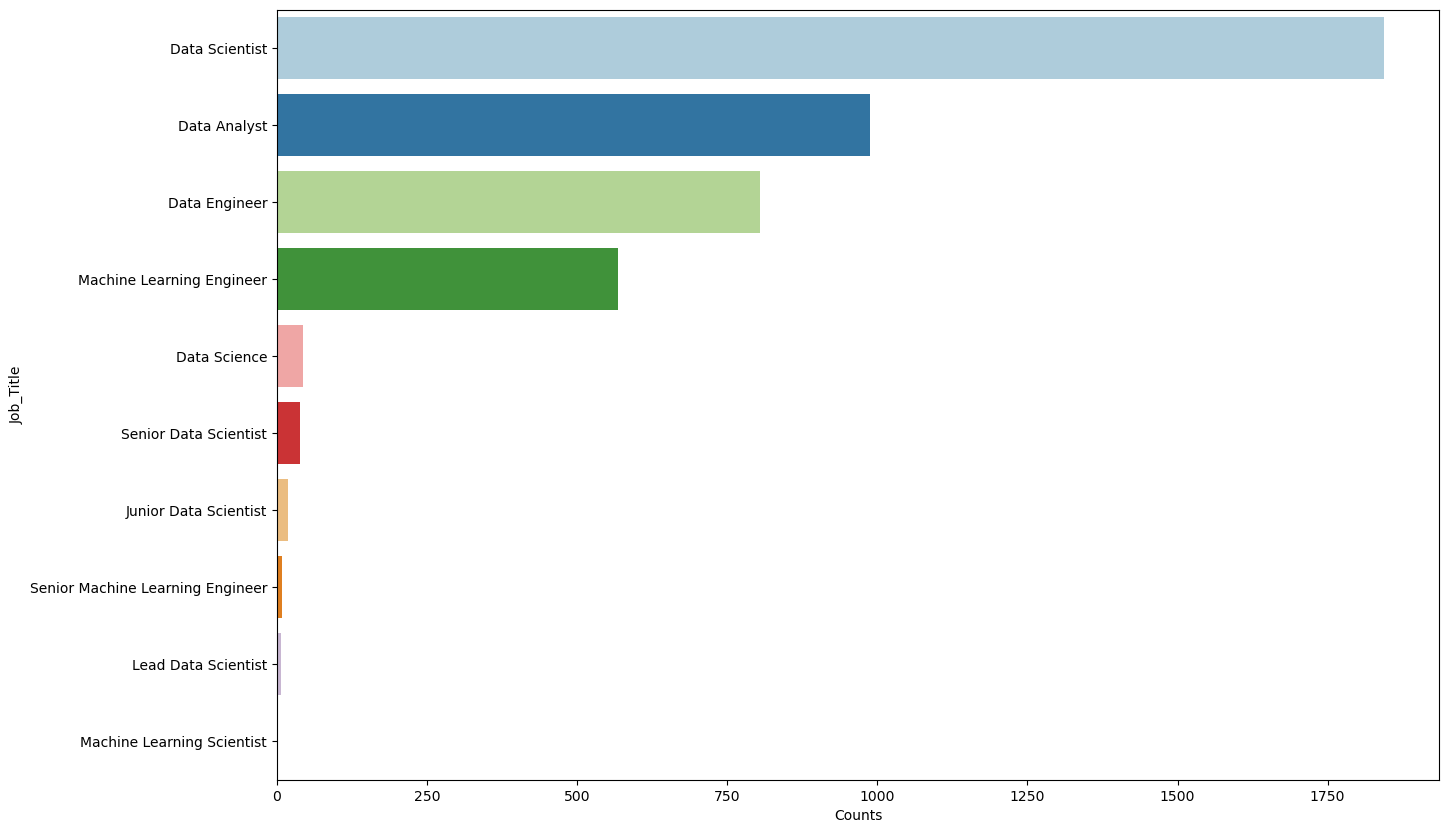

In [32]:
figure_size()
sns.barplot(x=job.values[:10],y=job.index[:10],palette = 'Paired')
plt.ylabel('Job_Title')
plt.xlabel('Counts')
plt.show()

In [33]:
# Company_Name X Salary

df[['Company_Name', 'Salary']].groupby(['Company_Name'], as_index=False).mean().sort_values(by='Salary', ascending=False).round(2)

,Company_Name,Salary
298,Batlivala & Karani Securities,2361780.0
1021,ICE Mortgage Technology Senior,2361780.0
161,Amphisoft Technologies,2361780.0
1835,Ritwik IT Services,2361780.0
668,EBC,2361780.0
...,...,...
1403,Metaswitch,33120.0
4,20K Group,32260.0
836,Friends Union for Energising Lives (Fuel),29520.0
823,Fran Biz,24120.0


In [34]:
avg_company = df.groupby('Company_Name')['Salary'].mean().reset_index()
avg_company = avg_company.sort_values(by='Salary', ascending=False)

top_10_job = avg_company.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10_job['Company_Name'], y=top_10_job['Salary']))

fig.update_layout(title='Top 10 Company_Name by Salary',
                  xaxis_title='Company_Name',
                  yaxis_title='Average Salary',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [35]:
avg_company = df.groupby('Company_Name')['Salary'].mean().reset_index()
avg_company = avg_company.sort_values(by='Salary', ascending=True)

top_10_job = avg_company.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10_job['Company_Name'], y=top_10_job['Salary']))

fig.update_layout(title='The 10 Company_Name with the lowest salary',
                  xaxis_title='Company_Name',
                  yaxis_title='Average Salary',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [36]:
df.groupby(['Location','Job_Title']).mean().round(2)

Salaries Reported      Salary
Location  Job_Title                                                          
Bangalore Data Analyst                                       4.22   648567.84
          Data Engineer                                      2.84   964721.18
          Data Scientist                                     1.75  1063156.39
          Machine Learning Engineer                          1.28   844390.12
Hyderabad Associate Machine Learning Engineer                3.00   464372.00
          Data Analyst                                       2.32   592395.38
          Data Engineer                                      1.67   866375.98
          Data Scientist                                     2.07   950318.19
          Machine Learning Associate                         6.00   295114.00
          Machine Learning Data Analyst                      3.00   361378.00
          Machine Learning Data Associate                    6.00   275841.00
          Machine Learning Data Associate I                  6.00   258596.00
          Machine Learning Data Associate II                 5.00   383213.00
          Machine Learning Engineer                          1.33   784915.94
          Senior Machine Learning Engineer                   1.00  1539229.00
Mumbai    Data Analyst                                       2.52   522571.79
          Data Engineer                                      1.64   872607.21
          Data Scientist                                     1.92  1071885.53
          Machine Learning Developer                         1.00   581119.00
          Machine Learning Engineer                          1.22   669929.20
          Machine Learning Scientist                         1.00   170118.00
          Senior Machine Learning Engineer                   2.33  1225829.00
          Software Engineer - Machine Learning               1.00  1612324.00
New Delhi Data Analyst                                       3.92   569820.21
          Data Engineer                                      1.67   895960.11
          Data Scientist                                     2.56  1029232.06
          Machine Learning Engineer                          1.15   739402.43
Pune      Data Analyst                                       2.24   525567.50
          Data Engineer                                      1.78   868569.00
          Data Science                                       1.16   364905.33
          Data Science Associate                             6.00  1203913.00
          Data Science Consultant                            5.00  2361780.00
          Data Science Lead                                  2.00  2361780.00
          Data Science Manager                               2.00  2361780.00
          Data Scientist                                     1.62   974733.95
          Data Scientist - Trainee                           2.00   610512.00
          Junior Data Scientist                              1.11   596323.11
          Lead Data Scientist                                1.33  1772629.33
          Machine Learning Consultant                        1.00   706401.00
          Machine Learning Engineer                          1.16   709330.92
          Machine Learning Software Engineer                 1.00  1397347.00
          Senior Data Scientist                              1.23  1652806.46
          Software Engineer - Machine Learning               1.00  1521236.00

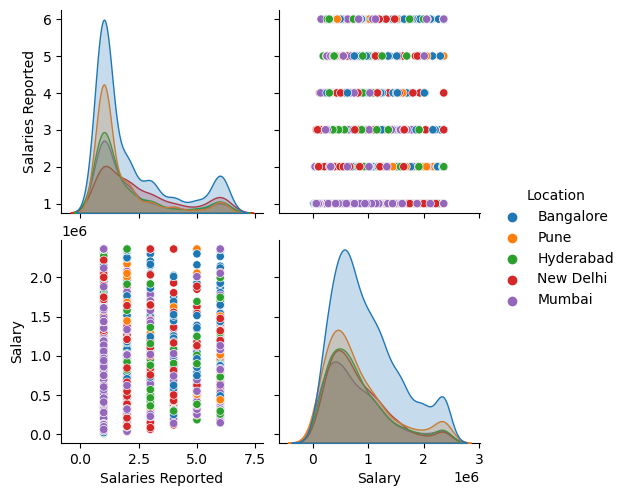

In [37]:
# Pairplot 'Location'
sns.pairplot(df,hue='Location')

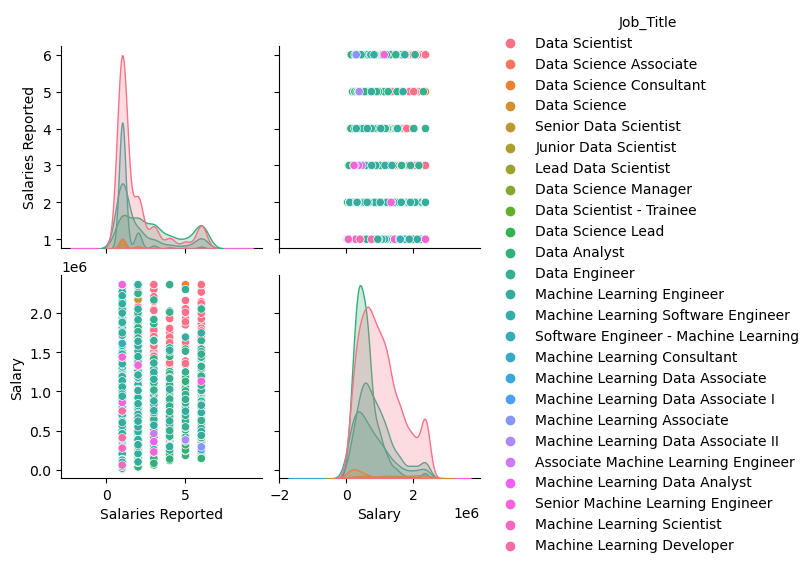

In [38]:
# Pairplot 'Job_Title'
sns.pairplot(df,hue='Job_Title')